In [ ]:
# R-script - Mendelian Randomization practicum 
 
# Applied research question: Does having higher proinflammatory CRP causally increase your blood pressure? 
# 1. Observational analyses (simple linear regressions in R)
# 2. MR/IV Analyses: Wald Estimator (simple linear regression)
# 3. MR/IV Analyses: TSLS (ivreg R-package)
# 4. Manual TSLS (simple linear regression)
# 5. Weak instrument bias

In [ ]:
R.version.string

[1] "R version 4.2.1 (2022-06-23)"

In [ ]:
rm(list = ls())   # remove all variables in the environment

In [ ]:
sex <- "male"
data_file <- paste("output/ukb_pheno_geno/ukb_pheno_geno_", sex, ".tab", sep="")

In [ ]:
length(WHR)

[1] 142163

In [ ]:
dim(example)

[1] 142163     44

In [ ]:
sum(is.na(example))

[1] 0

In [ ]:
length(CAD)
length(WHR)

[1] 142163

[1] 142163

[1] 142163

[1] 142163


Call:
lm(formula = CAD ~ WHR)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.38344 -0.09208 -0.07258 -0.05255  1.02922 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.67851    0.01018   66.64   <2e-16 ***
WHR          0.42624    0.01086   39.24   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2652 on 142161 degrees of freedom
Multiple R-squared:  0.01071,	Adjusted R-squared:  0.01071 
F-statistic:  1539 on 1 and 142161 DF,  p-value: < 2.2e-16


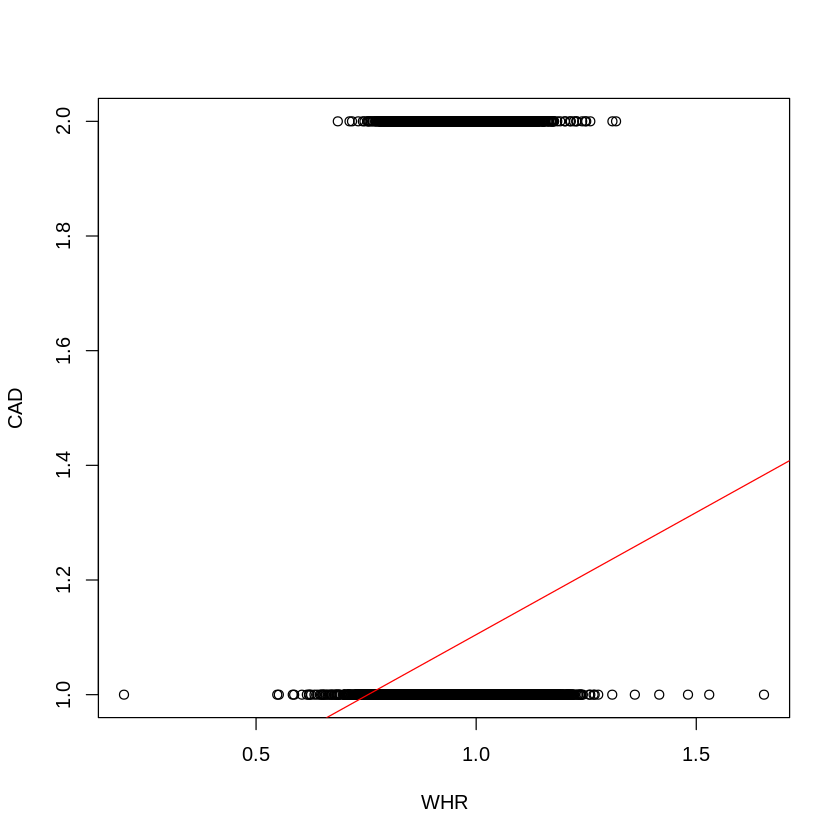

In [ ]:
########################################
#####  1. Observational analyses   #####
########################################
length(CAD)
length(WHR)
summary(lm(CAD ~ WHR)) 

# Plot the observational association between CAD and WHR
plot(WHR,CAD)
abline(lm(CAD~WHR),col="red")

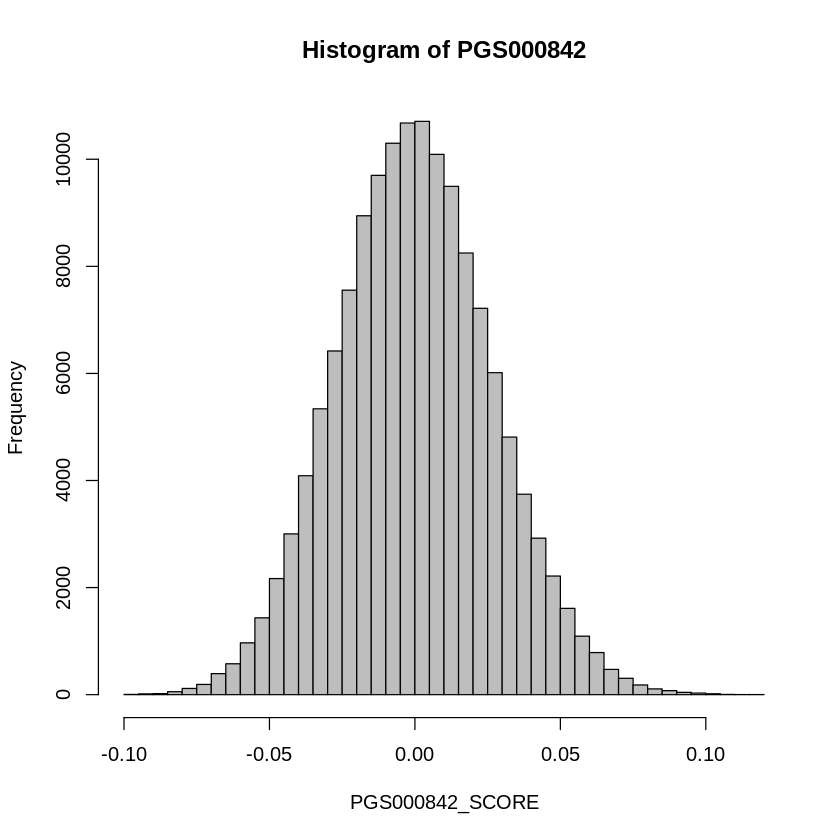

In [ ]:
hist(PGS000842_SCORE, breaks=50, col = "grey", main = "Histogram of PGS000842")

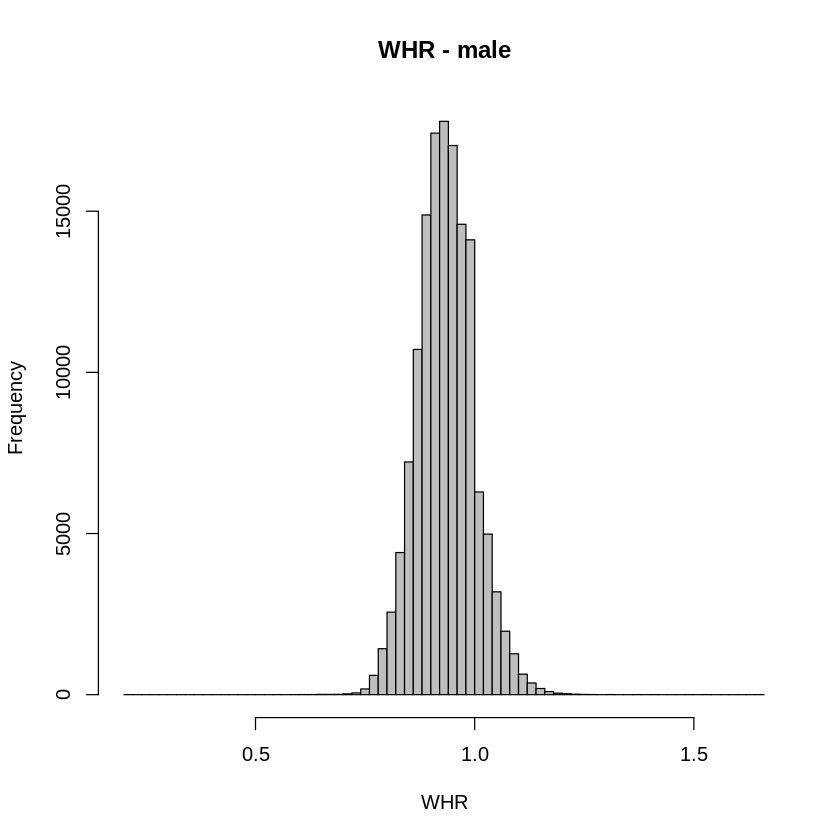

In [ ]:
hist(WHR, breaks=100, col = "grey", main = "WHR - male")


Call:
lm(formula = WHR ~ PGS000842_SCORE)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.74162 -0.04266 -0.00182  0.04042  0.71610 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.9349993  0.0001715 5451.19   <2e-16 ***
PGS000842_SCORE 0.1216664  0.0064594   18.84   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06467 on 142161 degrees of freedom
Multiple R-squared:  0.002489,	Adjusted R-squared:  0.002482 
F-statistic: 354.8 on 1 and 142161 DF,  p-value: < 2.2e-16


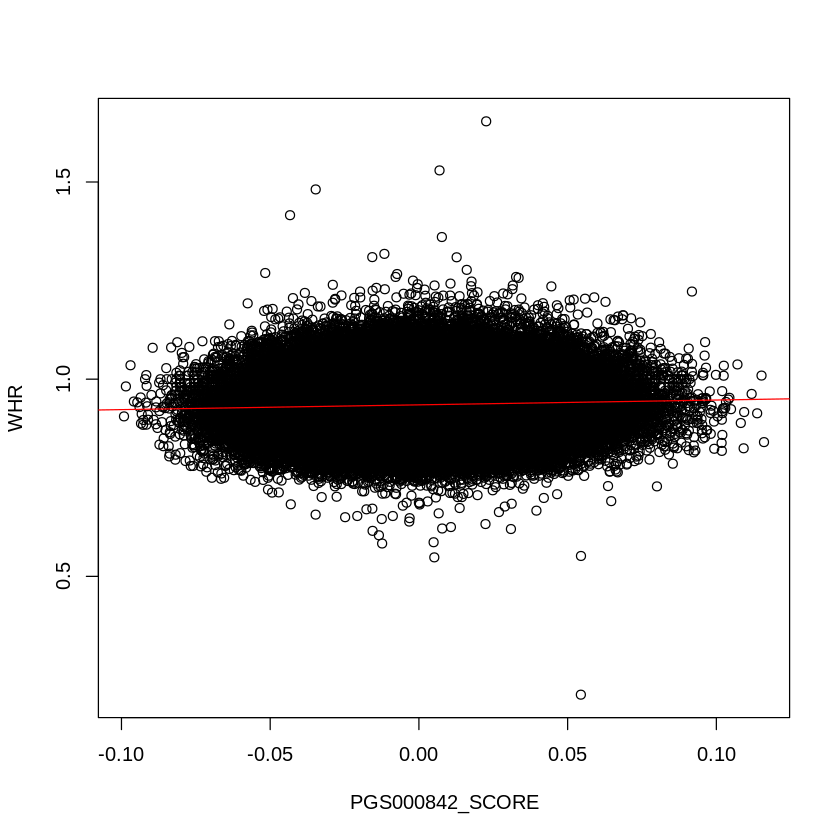

In [ ]:
summary(lm(WHR~PGS000842_SCORE)) 

# Plot the observational association between CAD and WHR
plot(PGS000842_SCORE, WHR)
abline(lm(WHR~PGS000842_SCORE),col="red")


Call:
lm(formula = CAD ~ PGS000842_SCORE)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.08549 -0.07818 -0.07680 -0.07531  0.93014 

Coefficients:
                 Estimate Std. Error  t value Pr(>|t|)    
(Intercept)     1.0770383  0.0007072 1522.957  < 2e-16 ***
PGS000842_SCORE 0.0728862  0.0266329    2.737  0.00621 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2666 on 142161 degrees of freedom
Multiple R-squared:  5.268e-05,	Adjusted R-squared:  4.565e-05 
F-statistic:  7.49 on 1 and 142161 DF,  p-value: 0.006207


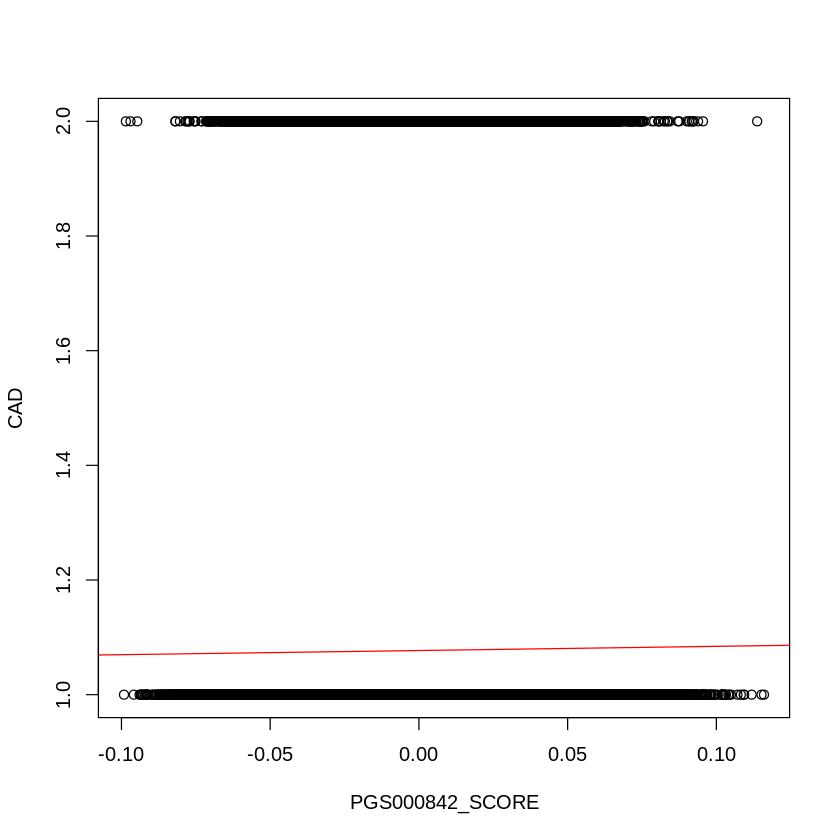

In [ ]:
summary(lm(CAD~PGS000842_SCORE)) 

# Plot the observational association between CAD and WHR
plot(PGS000842_SCORE, CAD)
abline(lm(CAD~PGS000842_SCORE),col="red")

In [ ]:
#colnames(example)

[1] "FID"             "IID_PHENO"       "SEX_PHENO"       "AGE"            
 [5] "WAIST"           "HIP"             "PC1"             "PC2"            
 [9] "PC3"             "PC4"             "PC5"             "PC6"            
[13] "PC7"             "PC8"             "PC9"             "PC10"           
[17] "CAD"             "WHR"             "AFR"             "LFR"            
[21] "TFR"             "EID"             "EVER_SMOKED"     "BMI"            
[25] "TOWNSEND"        "IID_GENO"        "PAT"             "MAT"            
[29] "SEX_GENO"        "PHENOTYPE"       "rs1891141_T"     "rs17049548_T"   
[33] "rs695238_C"      "rs900400_C"      "rs7901384_C"     "rs12361415_G"   
[37] "rs12432376_G"    "rs4788190_G"     "rs62074125_C"    "rs1075403_T"    
[41] "rs10403360_A"    "PGS000842_SCORE" "DBP"             "SBP"

In [ ]:
summary(lm(PGS000842_SCORE~WHR)) 


Call:
lm(formula = PGS000842_SCORE ~ WHR)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.099467 -0.018113 -0.000427  0.017532  0.117953 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.019131   0.001018  -18.79   <2e-16 ***
WHR          0.020461   0.001086   18.84   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02652 on 142161 degrees of freedom
Multiple R-squared:  0.002489,	Adjusted R-squared:  0.002482 
F-statistic: 354.8 on 1 and 142161 DF,  p-value: < 2.2e-16


In [ ]:
summary(lm(PGS000842_SCORE~CAD)) 


Call:
lm(formula = PGS000842_SCORE ~ CAD)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.099179 -0.018144 -0.000405  0.017585  0.116074 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -0.0007785  0.0002930  -2.657  0.00790 **
CAD          0.0007228  0.0002641   2.737  0.00621 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02655 on 142161 degrees of freedom
Multiple R-squared:  5.268e-05,	Adjusted R-squared:  4.565e-05 
F-statistic:  7.49 on 1 and 142161 DF,  p-value: 0.006207


In [ ]:
summary(lm(PGS000842_SCORE~AGE)) 


Call:
lm(formula = PGS000842_SCORE ~ AGE)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.099141 -0.018139 -0.000402  0.017592  0.116038 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept) -1.158e-04  4.984e-04  -0.232    0.816
AGE          2.035e-06  8.676e-06   0.235    0.815

Residual standard error: 0.02655 on 142161 degrees of freedom
Multiple R-squared:  3.872e-07,	Adjusted R-squared:  -6.647e-06 
F-statistic: 0.05504 on 1 and 142161 DF,  p-value: 0.8145


In [ ]:
summary(lm(PGS000842_SCORE~EVER_SMOKED)) 


Call:
lm(formula = PGS000842_SCORE ~ EVER_SMOKED)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.099135 -0.018135 -0.000399  0.017584  0.116032 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept)  2.512e-05  1.200e-04   0.209    0.834
EVER_SMOKED -3.835e-05  1.482e-04  -0.259    0.796

Residual standard error: 0.02655 on 142161 degrees of freedom
Multiple R-squared:  4.71e-07,	Adjusted R-squared:  -6.563e-06 
F-statistic: 0.06696 on 1 and 142161 DF,  p-value: 0.7958


In [ ]:
summary(lm(PGS000842_SCORE~TOWNSEND)) 


Call:
lm(formula = PGS000842_SCORE ~ TOWNSEND)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.099217 -0.018140 -0.000397  0.017582  0.116065 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept) -3.743e-05  7.801e-05  -0.480    0.631
TOWNSEND    -2.579e-05  2.312e-05  -1.115    0.265

Residual standard error: 0.02655 on 142161 degrees of freedom
Multiple R-squared:  8.749e-06,	Adjusted R-squared:  1.714e-06 
F-statistic: 1.244 on 1 and 142161 DF,  p-value: 0.2648


In [ ]:
summary(lm(PGS000842_SCORE~DBP)) 


Call:
lm(formula = PGS000842_SCORE ~ DBP)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.099125 -0.018138 -0.000404  0.017584  0.116025 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept)  1.260e-04  2.509e-04   0.502    0.616
DBP         -1.603e-06  3.062e-06  -0.523    0.601

Residual standard error: 0.02655 on 142161 degrees of freedom
Multiple R-squared:  1.926e-06,	Adjusted R-squared:  -5.108e-06 
F-statistic: 0.2738 on 1 and 142161 DF,  p-value: 0.6008


In [ ]:
summary(lm(PGS000842_SCORE~SBP)) 


Call:
lm(formula = PGS000842_SCORE ~ SBP)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.099123 -0.018138 -0.000401  0.017585  0.116011 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept)  1.500e-04  2.495e-04   0.601    0.548
SBP         -1.122e-06  1.790e-06  -0.627    0.531

Residual standard error: 0.02655 on 142161 degrees of freedom
Multiple R-squared:  2.763e-06,	Adjusted R-squared:  -4.271e-06 
F-statistic: 0.3928 on 1 and 142161 DF,  p-value: 0.5308


In [ ]:
summary(lm(CAD~WHR+AGE+PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8+PC9+PC10))


Call:
lm(formula = CAD ~ WHR + AGE + PC1 + PC2 + PC3 + PC4 + PC5 + 
    PC6 + PC7 + PC8 + PC9 + PC10)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.31963 -0.10840 -0.07368 -0.02693  1.04514 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.102e-01  1.096e-02  46.546  < 2e-16 ***
WHR          3.132e-01  1.094e-02  28.630  < 2e-16 ***
AGE          4.859e-03  8.755e-05  55.499  < 2e-16 ***
PC1          1.877e-04  2.836e-04   0.662   0.5080    
PC2         -7.514e-05  3.451e-04  -0.218   0.8276    
PC3         -4.071e-04  3.976e-04  -1.024   0.3059    
PC4         -4.342e-05  1.768e-04  -0.246   0.8060    
PC5          6.836e-04  1.005e-04   6.800 1.05e-11 ***
PC6          5.120e-04  3.706e-04   1.382   0.1670    
PC7         -8.064e-05  1.685e-04  -0.479   0.6322    
PC8          4.375e-04  2.419e-04   1.808   0.0705 .  
PC9          7.409e-04  1.546e-04   4.793 1.65e-06 ***
PC10         4.225e-04  3.079e-04   1.372   0.1699    
---
Sign

### MR/IV Analysis: TSLS

In [ ]:
library(AER)

Loading required package: car

Loading required package: carData

Loading required package: lmtest

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich

Loading required package: survival



In [ ]:
summary(ivreg(CAD~WHR))


Call:
ivreg(formula = CAD ~ WHR)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.38344 -0.09208 -0.07258 -0.05255  1.02922 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.67851    0.01018   66.64   <2e-16 ***
WHR          0.42624    0.01086   39.24   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2652 on 142161 degrees of freedom
Multiple R-Squared: 0.01071,	Adjusted R-squared: 0.01071 
Wald test:  1539 on 1 and 142161 DF,  p-value: < 2.2e-16 


In [ ]:
summary(ivreg(CAD~WHR | AGE+PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8+PC9+PC10))


Call:
ivreg(formula = CAD ~ WHR | AGE + PC1 + PC2 + PC3 + PC4 + PC5 + 
    PC6 + PC7 + PC8 + PC9 + PC10)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.62042 -0.20193 -0.03999  0.12542  2.52350 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.23112    0.06814  -32.74   <2e-16 ***
WHR          3.53814    0.07287   48.55   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3331 on 142161 degrees of freedom
Multiple R-Squared: -0.5603,	Adjusted R-squared: -0.5603 
Wald test:  2357 on 1 and 142161 DF,  p-value: < 2.2e-16 


In [ ]:
summary(ivreg(CAD~WHR |rs1891141_T+rs17049548_T+rs695238_C+rs900400_C+rs7901384_C+rs12361415_G
              +rs12432376_G+rs4788190_G+rs62074125_C+rs1075403_T+rs10403360_A))


Call:
ivreg(formula = CAD ~ WHR | rs1891141_T + rs17049548_T + rs695238_C + 
    rs900400_C + rs7901384_C + rs12361415_G + rs12432376_G + 
    rs4788190_G + rs62074125_C + rs1075403_T + rs10403360_A)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.30993 -0.08847 -0.07365 -0.05843  1.00372 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.7741     0.1725   4.487 7.23e-06 ***
WHR           0.3240     0.1845   1.756   0.0791 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2653 on 142161 degrees of freedom
Multiple R-Squared: 0.0101,	Adjusted R-squared: 0.01009 
Wald test: 3.083 on 1 and 142161 DF,  p-value: 0.07913 


In [ ]:
summary(ivreg(CAD~WHR + AGE+PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8+PC9+PC10  | 
              AGE+PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8+PC9+PC10
              +rs1891141_T+rs17049548_T+rs695238_C+rs900400_C+rs7901384_C
              +rs12361415_G+rs12432376_G+rs4788190_G+rs62074125_C+rs1075403_T+rs10403360_A))


Call:
ivreg(formula = CAD ~ WHR + AGE + PC1 + PC2 + PC3 + PC4 + PC5 + 
    PC6 + PC7 + PC8 + PC9 + PC10 | AGE + PC1 + PC2 + PC3 + PC4 + 
    PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + rs1891141_T + rs17049548_T + 
    rs695238_C + rs900400_C + rs7901384_C + rs12361415_G + rs12432376_G + 
    rs4788190_G + rs62074125_C + rs1075403_T + rs10403360_A)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.3396 -0.1085 -0.0734 -0.0265  1.0478 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.863e-01  1.563e-01   3.111  0.00186 ** 
WHR          3.412e-01  1.834e-01   1.861  0.06278 .  
AGE          4.817e-03  2.856e-04  16.867  < 2e-16 ***
PC1          1.862e-04  2.838e-04   0.656  0.51184    
PC2         -7.018e-05  3.466e-04  -0.202  0.83955    
PC3         -4.077e-04  3.976e-04  -1.025  0.30519    
PC4         -4.722e-05  1.785e-04  -0.264  0.79142    
PC5          6.789e-04  1.051e-04   6.458 1.06e-10 ***
PC6          5.108e-04  3.707e-04   1.378  0.16823 

### MR/IV Analysis: TSLS using PGS000842

In [ ]:
summary(ivreg(CAD ~ WHR + AGE+PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8+PC9+PC10 | AGE+PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8+PC9+PC10+PGS000842_SCORE))


Call:
ivreg(formula = CAD ~ WHR + AGE + PC1 + PC2 + PC3 + PC4 + PC5 + 
    PC6 + PC7 + PC8 + PC9 + PC10 | AGE + PC1 + PC2 + PC3 + PC4 + 
    PC5 + PC6 + PC7 + PC8 + PC9 + PC10 + PGS000842_SCORE)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.49784 -0.11073 -0.07085 -0.02170  1.07439 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.972e-01  1.870e-01   1.589   0.1121    
WHR          5.632e-01  2.194e-01   2.567   0.0103 *  
AGE          4.487e-03  3.371e-04  13.311  < 2e-16 ***
PC1          1.738e-04  2.844e-04   0.611   0.5411    
PC2         -3.086e-05  3.479e-04  -0.089   0.9293    
PC3         -4.128e-04  3.983e-04  -1.036   0.3000    
PC4         -7.728e-05  1.796e-04  -0.430   0.6670    
PC5          6.416e-04  1.072e-04   5.984 2.19e-09 ***
PC6          5.005e-04  3.714e-04   1.348   0.1777    
PC7         -9.781e-05  1.695e-04  -0.577   0.5639    
PC8          4.258e-04  2.426e-04   1.755   0.0792 .  
PC9          7.703e-04  1

### Manual TSLS

In [ ]:
First_Stage <- lm (WHR~ AGE+PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8+PC9+PC10 
                   +rs1891141_T+rs17049548_T+rs695238_C+rs900400_C+rs7901384_C+rs12361415_G+rs12432376_G
                   +rs4788190_G+rs62074125_C+rs1075403_T+rs10403360_A)
Pred_WHR <- predict(First_Stage)
# Second stage regression
Second_Stage <- lm(CAD~Pred_WHR+AGE+PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8+PC9+PC10)
# Look at the results:
summary(Second_Stage)


Call:
lm(formula = CAD ~ Pred_WHR + AGE + PC1 + PC2 + PC3 + PC4 + PC5 + 
    PC6 + PC7 + PC8 + PC9 + PC10)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.17282 -0.10817 -0.07550 -0.02835  1.02060 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.863e-01  1.568e-01   3.102  0.00192 ** 
Pred_WHR     3.412e-01  1.839e-01   1.856  0.06353 .  
AGE          4.817e-03  2.864e-04  16.819  < 2e-16 ***
PC1          1.862e-04  2.846e-04   0.654  0.51303    
PC2         -7.018e-05  3.476e-04  -0.202  0.84000    
PC3         -4.077e-04  3.987e-04  -1.022  0.30656    
PC4         -4.722e-05  1.790e-04  -0.264  0.79200    
PC5          6.789e-04  1.054e-04   6.440 1.20e-10 ***
PC6          5.108e-04  3.717e-04   1.374  0.16944    
PC7         -8.257e-05  1.694e-04  -0.487  0.62606    
PC8          4.362e-04  2.428e-04   1.797  0.07237 .  
PC9          7.442e-04  1.565e-04   4.755 1.99e-06 ***
PC10         4.172e-04  3.107e-04   1.343  0.17936    
---

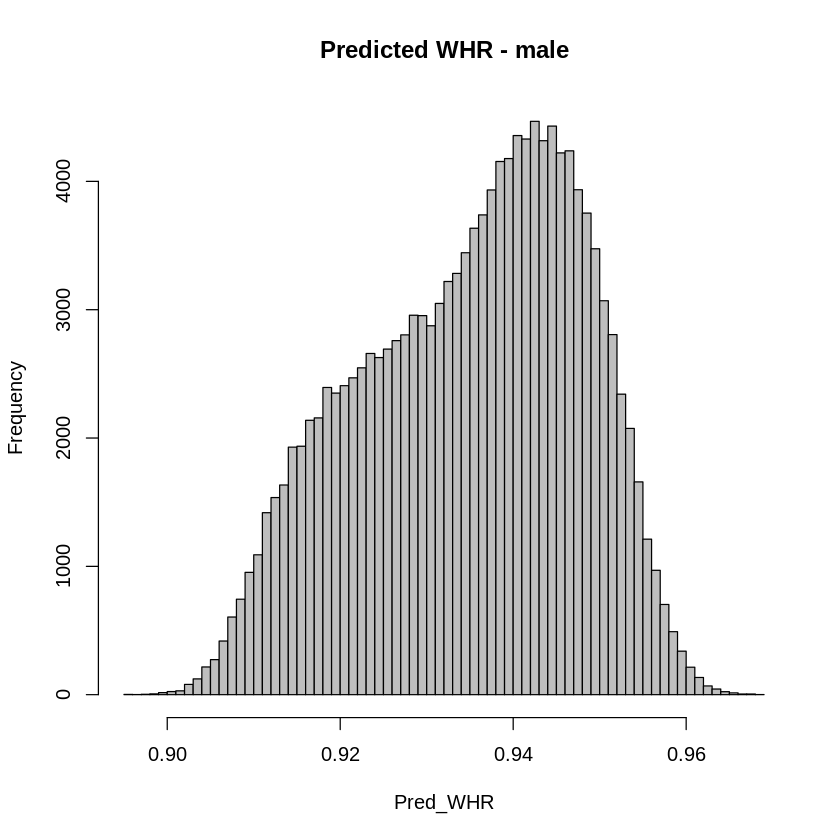

In [ ]:
hist(Pred_WHR, breaks=100, col = "grey", main = "Predicted WHR - male")

### Manual TSLS using PGS000842_SCORE

In [ ]:
First_Stage <- lm (WHR ~ AGE+PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8+PC9+PC10+PGS000842_SCORE)
Pred_WHR <- predict(First_Stage)
Second_Stage <- lm(CAD~Pred_WHR+AGE+PC1+PC2+PC3+PC4+PC5+PC6+PC7+PC8+PC9+PC10)
summary(Second_Stage)


Call:
lm(formula = CAD ~ Pred_WHR + AGE + PC1 + PC2 + PC3 + PC4 + PC5 + 
    PC6 + PC7 + PC8 + PC9 + PC10)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.17243 -0.10819 -0.07545 -0.02833  1.01924 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.972e-01  1.872e-01   1.587   0.1125    
Pred_WHR     5.632e-01  2.197e-01   2.564   0.0103 *  
AGE          4.487e-03  3.375e-04  13.298  < 2e-16 ***
PC1          1.738e-04  2.847e-04   0.611   0.5415    
PC2         -3.086e-05  3.483e-04  -0.089   0.9294    
PC3         -4.128e-04  3.988e-04  -1.035   0.3005    
PC4         -7.728e-05  1.798e-04  -0.430   0.6673    
PC5          6.416e-04  1.073e-04   5.977 2.27e-09 ***
PC6          5.005e-04  3.718e-04   1.346   0.1782    
PC7         -9.781e-05  1.696e-04  -0.577   0.5643    
PC8          4.258e-04  2.428e-04   1.754   0.0795 .  
PC9          7.703e-04  1.572e-04   4.901 9.54e-07 ***
PC10         3.750e-04  3.116e-04   1.204   0.2287    
---

In [ ]:
##################################################
#######    5. Weak instruments bias       ########
##################################################


# Assessing instrument strength with the F-stat (looking for >10).
# For Single SNP MR, the F-statistic is calculated as:

# Fstat = R2 * (N-2)/(1-R2)

# where R2 is the variance explained in exposure by the SNP, and N is number of individuals in the study. 
# This statistic is available in the output for OLS and TSLS


#------------------------------------------------------------------------------------------------------------------
#-------------      Q10. Looking at the F-statistic, determine if weak instruments may be an issue      -----------
#------------------------------------------------------------------------------------------------------------------


#Look at F-stat from the first-stage linear regression
 summary(lm(WHR~rs1891141_T+rs17049548_T+rs695238_C+rs900400_C+rs7901384_C+rs12361415_G+rs12432376_G
            +rs4788190_G+rs62074125_C+rs1075403_T+rs10403360_A))

#Look at F-stat from ?diagnostics? by AER package
summary(ivreg(CAD~WHR | +rs1891141_T+rs17049548_T+rs695238_C+rs900400_C+rs7901384_C+rs12361415_G
              +rs12432376_G+rs4788190_G+rs62074125_C+rs1075403_T+rs10403360_A), diagnostics=T)

##########
#*CHECK*
#Are all the variables and parameters now complete in your graphical representation?



Call:
lm(formula = WHR ~ rs1891141_T + rs17049548_T + rs695238_C + 
    rs900400_C + rs7901384_C + rs12361415_G + rs12432376_G + 
    rs4788190_G + rs62074125_C + rs1075403_T + rs10403360_A)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.72549 -0.04258 -0.00183  0.04043  0.71604 

Coefficients:
               Estimate Std. Error  t value Pr(>|t|)    
(Intercept)   0.9365586  0.0006312 1483.764  < 2e-16 ***
rs1891141_T  -0.0017095  0.0002794   -6.118 9.51e-10 ***
rs17049548_T -0.0019189  0.0003249   -5.906 3.52e-09 ***
rs695238_C    0.0014580  0.0002418    6.029 1.65e-09 ***
rs900400_C   -0.0017887  0.0002479   -7.216 5.39e-13 ***
rs7901384_C   0.0015818  0.0002418    6.541 6.12e-11 ***
rs12361415_G -0.0018867  0.0002670   -7.066 1.60e-12 ***
rs12432376_G -0.0016775  0.0002731   -6.142 8.19e-10 ***
rs4788190_G  -0.0016240  0.0002436   -6.667 2.61e-11 ***
rs62074125_C -0.0019071  0.0002779   -6.862 6.80e-12 ***
rs1075403_T   0.0019746  0.0002518    7.843 4.45e-15 ***
rs104


Call:
ivreg(formula = CAD ~ WHR | +rs1891141_T + rs17049548_T + rs695238_C + 
    rs900400_C + rs7901384_C + rs12361415_G + rs12432376_G + 
    rs4788190_G + rs62074125_C + rs1075403_T + rs10403360_A)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.30993 -0.08847 -0.07365 -0.05843  1.00372 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.7741     0.1725   4.487 7.23e-06 ***
WHR           0.3240     0.1845   1.756   0.0791 .  

Diagnostic tests:
                    df1    df2 statistic p-value    
Weak instruments     11 142151    44.976  <2e-16 ***
Wu-Hausman            1 142160     0.308  0.5787    
Sargan               10     NA    18.454  0.0478 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2653 on 142161 degrees of freedom
Multiple R-Squared: 0.0101,	Adjusted R-squared: 0.01009 
Wald test: 3.083 on 1 and 142161 DF,  p-value: 0.07913 


rs1891141_T+rs17049548_T+rs695238_C+rs900400_C+rs7901384_C+rs12361415_G+rs12432376_G+rs4788190_G+rs62074125_C+rs1075403_T+rs10403360_A

In [ ]:
summary(lm(WHR~rs10403360_A))


Call:
lm(formula = WHR ~ rs10403360_A)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.73360 -0.04271 -0.00194  0.03952  0.71691 

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept)  0.9336041  0.0002670 3496.198  < 2e-16 ***
rs10403360_A 0.0016662  0.0002442    6.822 9.01e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06474 on 142161 degrees of freedom
Multiple R-squared:  0.0003273,	Adjusted R-squared:  0.0003202 
F-statistic: 46.54 on 1 and 142161 DF,  p-value: 9.005e-12


In [ ]:
library(TwoSampleMR)
library(ggplot2)

TwoSampleMR version 0.5.6 
[>] New: Option to use non-European LD reference panels for clumping etc
[>] Some studies temporarily quarantined to verify effect allele
[>] See news(package='TwoSampleMR') and https://gwas.mrcieu.ac.uk for further details




In [ ]:
colnames(example)

[1] "FID"             "IID_PHENO"       "SEX_PHENO"       "AGE"            
 [5] "WAIST"           "HIP"             "PC1"             "PC2"            
 [9] "PC3"             "PC4"             "PC5"             "PC6"            
[13] "PC7"             "PC8"             "PC9"             "PC10"           
[17] "CAD"             "WHR"             "AFR"             "LFR"            
[21] "TFR"             "EID"             "EVER_SMOKED"     "BMI"            
[25] "TOWNSEND"        "IID_GENO"        "PAT"             "MAT"            
[29] "SEX_GENO"        "PHENOTYPE"       "rs1891141_T"     "rs17049548_T"   
[33] "rs695238_C"      "rs900400_C"      "rs7901384_C"     "rs12361415_G"   
[37] "rs12432376_G"    "rs4788190_G"     "rs62074125_C"    "rs1075403_T"    
[41] "rs10403360_A"    "PGS000842_SCORE" "DBP"             "SBP"

In [ ]:
n_cols <- ncol(example)
columns = c("SNP", 
            "effect_allele.exposure","beta.exposure","se.exposure", "t.exposure", "p.exposure",
            "effect_allele.outcome","beta.outcome","se.outcome", "t.outcome", "p.outcome",
            "id.exposure", "exposure", "id.outcome", "outcome", "mr_keep") 
my_df = data.frame(matrix(nrow = 0, ncol = length(columns))) 
colnames(my_df) = columns
for (col_index in seq(31, 41)) # all snp columns for female
{
    cad_summary <- summary(lm(example[, "CAD"]~example[, col_index]))
    #print(class(cad_summary))
    cad_coefficients <- cad_summary$coefficients
    if (dim(cad_coefficients)[1] > 1){
        cad_coefficients <- cad_coefficients[2, ]
        } else {
        cad_coefficients <- c('', '', '', '')
    }
    whr_summary <- summary(lm(example[, "WHR"]~example[, col_index]))
    #print(class(cad_summary))
    whr_coefficients <- whr_summary$coefficients
    mr_keep <- NULL
    if (dim(whr_coefficients)[1] > 1){
        whr_coefficients <- whr_coefficients[2, ]
        mr_keep <- TRUE
        } else {
        mr_keep <- FALSE
        whr_coefficients <- c('', '', '', '')
    }
    #cad_sigma <- cad_summary$sigma
    #cad_rsquared <- cad_summary$r.squared
    #print(class(cad_coefficients))
    #print(cad_coefficients)
    snp_effect_allele <- strsplit(colnames(example)[col_index], "_")
    snp <- snp_effect_allele[[1]][1]
    effect_allele <- snp_effect_allele[[1]][2]
    #print(snp)
    #print(effect_allele)
    my_df <- rbind(my_df, c(c(snp, effect_allele),
                          as.vector(whr_coefficients), 
                          c(effect_allele),
                          as.vector(cad_coefficients), 
                          c("UKB_WHR", "WHR", "UKB_CAD", "CAD", mr_keep)))
}
colnames(my_df) = columns
write.csv(my_df, 
          file = paste("output/data_", sex, "_WHR_Exposure_CAD_Outcome_OneSample.csv"), 
          quote = FALSE,
          #sep = "",
          row.names=TRUE)

In [ ]:
dat<-read.csv("output/data_ male _WHR_Exposure_CAD_Outcome_OneSample.csv")

In [ ]:
#Make sure effect alleles match. Otherwise change sign of beta:
dat$effect_allele.outcome<-as.factor(dat$effect_allele.outcome)
dat$effect_allele.exposure<-as.factor(dat$effect_allele.exposure)
lev2 <- unique( c( levels(dat$effect_allele.outcome), levels(dat$effect_allele.exposure) ) )
dat$effect_allele.outcome <- factor(dat$effect_allele.outcome, levels=lev2)
dat$effect_allele.exposure <- factor(dat$effect_allele.exposure, levels=lev2)
dat$effect_allele.exposure<-gsub(" ", "",dat$effect_allele.exposure, fixed = TRUE)
dat$beta.exposure[dat$effect_allele.exposure!=dat$effect_allele.outcome]<-dat$beta.exposure[dat$effect_allele.exposure!=dat$effect_allele.outcome] * -1

#To see MR methods that can be used:
mr_method_list()
#Default methods: IVW, MR-Egger, Weighted Median, Simple Mode, Weighted Mode

#To view default parameters (parameters used unless otherwise specified):
default_parameters()

obj,name,PubmedID,Description,use_by_default,heterogeneity_test
<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>
mr_wald_ratio,Wald ratio,,,TRUE,FALSE
mr_two_sample_ml,Maximum likelihood,,,FALSE,TRUE
mr_egger_regression,MR Egger,26050253,,TRUE,TRUE
mr_egger_regression_bootstrap,MR Egger (bootstrap),26050253,,FALSE,FALSE
mr_simple_median,Simple median,,,FALSE,FALSE
mr_weighted_median,Weighted median,,,TRUE,FALSE
mr_penalised_weighted_median,Penalised weighted median,,,FALSE,FALSE
mr_ivw,Inverse variance weighted,,,TRUE,TRUE
mr_ivw_radial,IVW radial,,,FALSE,TRUE


$test_dist
[1] "z"

$nboot
[1] 1000

$Cov
[1] 0

$penk
[1] 20

$phi
[1] 1

$alpha
[1] 0.05

$Qthresh
[1] 0.05

$over.dispersion
[1] TRUE

$loss.function
[1] "huber"

$shrinkage
[1] FALSE

In [ ]:
res<-mr(dat, method_list=c("mr_egger_regression", "mr_ivw", "mr_weighted_median"))
res

Analysing 'UKB_WHR' on 'UKB_CAD'



id.exposure,id.outcome,outcome,exposure,method,nsnp,b,se,pval
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
UKB_WHR,UKB_CAD,CAD,WHR,MR Egger,11,-1.0018842,2.9417256,0.7412370
UKB_WHR,UKB_CAD,CAD,WHR,Inverse variance weighted,11,0.3270804,0.2497732,0.1903618
UKB_WHR,UKB_CAD,CAD,WHR,Weighted median,11,0.3893250,0.2666992,0.1443475


In [ ]:
p1 <- mr_scatter_plot(res, dat)
ggsave(p1[[1]], file = "plots/male_scatter.pdf.pdf", width = 7, height = 7)


res_single <- mr_singlesnp(dat)
p2 <- mr_forest_plot(res_single)
ggsave(p2[[1]], file = "plots/male_forest.pdf", width = 7, height = 7)

res_single <- mr_singlesnp(dat, all_method = c("mr_ivw"))
p3 <- mr_forest_plot(res_single)
ggsave(p3[[1]], file = "plots/male_forest_methods.pdf", width = 7, height = 7)

res_loo <- mr_leaveoneout(dat)
p3 <- mr_leaveoneout_plot(res_loo)
ggsave(p3[[1]], file = "plots/male_leaveoneout.pdf", width = 7, height = 7)


res_single <- mr_singlesnp(dat)
p4 <- mr_funnel_plot(res_single)
ggsave(p4[[1]], file = "plots/male_funnel.pdf", width = 7, height = 7)


Warning message:
“Removed 1 rows containing missing values (`geom_errorbarh()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_errorbarh()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_errorbarh()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


In [ ]:
mr_pleiotropy_test(dat)

id.exposure,id.outcome,outcome,exposure,egger_intercept,se,pval
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
UKB_WHR,UKB_CAD,CAD,WHR,0.002335244,0.005148893,0.6608956
